In [31]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
# import the necessary packages

In [32]:
train = pd.read_csv("train.csv")
train.head()

test = pd.read_csv("test.csv")
test.head()

data = pd.concat([train, test]).reset_index(drop=True)
data.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0.0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0.0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0.0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0.0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0.0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [33]:
data.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,...,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000
mean,0.100490,10.669326,-1.625933,10.711322,6.792372,11.077366,-5.057938,5.412056,16.537496,0.280648,...,3.212103,7.448339,1.926891,3.326895,17.995376,-0.137873,2.297117,8.910293,15.869952,-3.286439
std,0.300653,3.038398,4.045275,2.637393,2.048028,1.619805,7.866274,0.865652,3.421286,3.333002,...,4.555632,3.024243,1.479193,3.993813,3.137905,1.429530,5.450356,0.921266,3.009828,10.418385
min,0.000000,0.188700,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.216400,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-39.457800
25%,0.000000,8.448900,-4.720800,8.729700,5.242175,9.886975,-11.200825,4.770200,13.938200,-2.310825,...,-0.077200,5.161900,0.886700,0.586075,15.632400,-1.165900,-1.947800,8.255800,13.838500,-11.171300
50%,0.000000,10.518950,-1.599400,10.570000,6.823700,11.104500,-4.833700,5.388500,16.439800,0.383100,...,3.181700,7.363700,1.897000,3.410900,17.967100,-0.167600,2.406800,8.890600,15.939200,-2.769700
75%,0.000000,12.748225,1.350025,12.505300,8.326000,12.256800,0.934700,6.004300,19.099000,2.934025,...,6.373200,9.521700,2.952800,6.191400,20.393800,0.834000,6.539300,9.594900,18.055325,4.889400
max,1.000000,22.323400,10.376800,19.353000,13.188300,16.671400,17.253700,8.447700,28.292800,10.151300,...,20.359000,16.716500,8.402400,18.281800,27.947800,4.545400,18.321500,12.275800,26.538400,28.500700


In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


In [35]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 201 entries, ID_code to var_199
dtypes: float64(200), object(1)
memory usage: 306.7+ MB


In [36]:
data.select_dtypes(include='object').columns

Index(['ID_code'], dtype='object')

In [37]:
data.columns[data.isna().any()]

Index(['target'], dtype='object')

<Axes: xlabel='target', ylabel='count'>

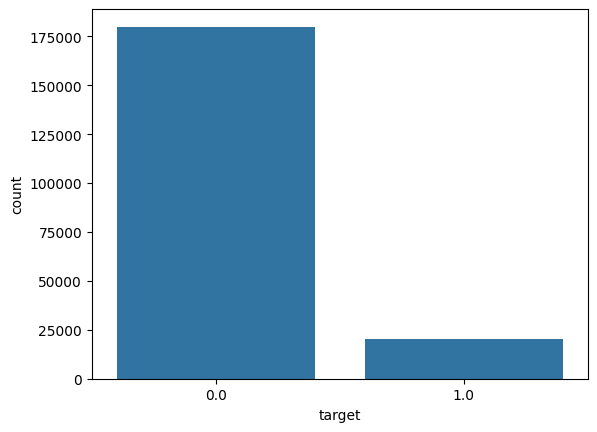

In [38]:
sns.countplot(data, x="target") # maybe imbalanced? 

In [39]:
data['target'].value_counts()

target
0.0    179902
1.0     20098
Name: count, dtype: int64

In [40]:
data_corr = pd.DataFrame(data)

data_corr = data_corr.drop('ID_code',axis=1)

In [41]:
f, ax = plt.subplots(figsize=(100, 100))

corr = data_corr.corr().abs()
matrix_mask = np.triu(np.ones_like(corr)) # only show the upper triangular for the correlation matrix
sns.heatmap(corr, linewidths=.5, mask=matrix_mask)

<Axes: >

Surprisingly no collinear relationships between the features themselves other than target variable. Possible did a PCA transformation and reduce the columns to 200 in order to hide the column names.

<Axes: xlabel='var_0', ylabel='var_1'>

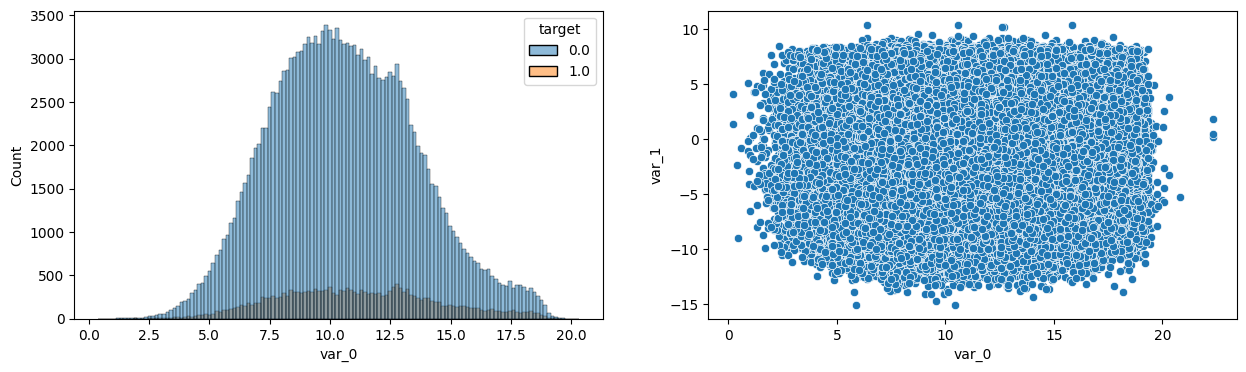

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(15, 4))

sns.histplot(data=data, x="var_0", hue="target",ax=axes[0])
sns.scatterplot(data=data, x="var_0", y="var_1",ax=axes[1])

Things look normally distributed and bivariate analysis doesn't give much. Let's check skew.

In [43]:
data_corr.skew().sort_values(ascending=False)

target     2.657642
var_168    0.268065
var_2      0.261597
var_179    0.245241
var_163    0.238993
             ...   
var_80    -0.215633
var_86    -0.217701
var_81    -0.233976
var_93    -0.241298
var_44    -0.334506
Length: 201, dtype: float64

In [44]:
data_corr.kurtosis().sort_values()

var_20    -0.818909
var_77    -0.805515
var_177   -0.801573
var_8     -0.797262
var_160   -0.767733
             ...   
var_146   -0.160731
var_93    -0.145538
var_44    -0.106990
var_179   -0.018888
target     5.063112
Length: 201, dtype: float64

<Axes: xlabel='var_20', ylabel='Count'>

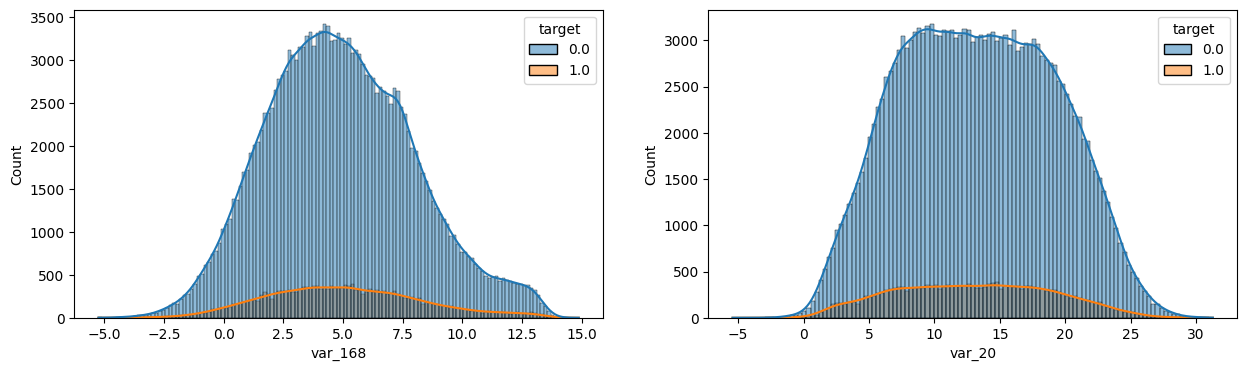

In [45]:
fig, axes = plt.subplots(1, 2, figsize=(15, 4))

sns.histplot(data=data, x="var_168", hue="target", kde=True,ax=axes[0])
sns.histplot(data=data, x="var_20", hue="target", kde=True,ax=axes[1])

Not much skew. Highest skew is 0.268065. Everything is scaled and looks good interestingly enough.

<Axes: xlabel='var_6', ylabel='Count'>

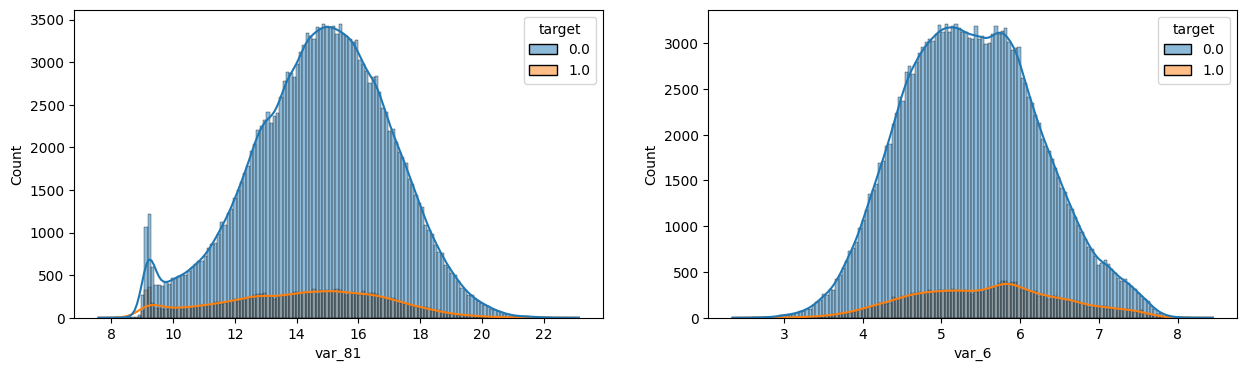

In [46]:
fig, axes = plt.subplots(1, 2, figsize=(15, 4))

sns.histplot(data=data, x="var_81", hue="target", kde=True,ax=axes[0])
sns.histplot(data=data, x="var_6", hue="target", kde=True,ax=axes[1])

Check for outliers

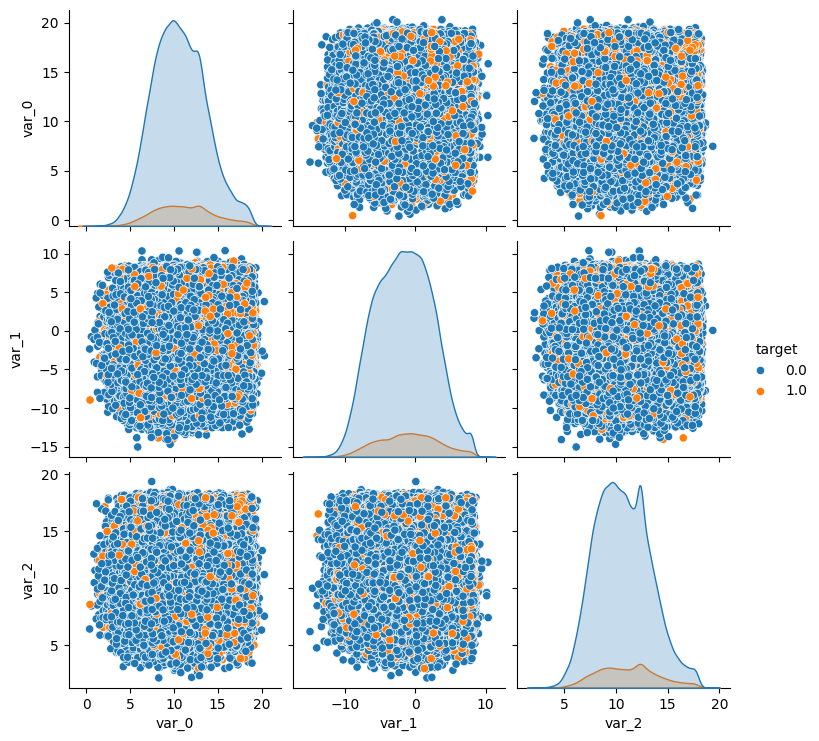

In [47]:
sns.pairplot(data, hue="target", vars=["var_0", "var_1", "var_2"])

In [48]:
train_data = data[data['target'].notna()]
test_data = data[data['target'].isna()]
test_data = test_data.drop('target', axis=1)

test_id = test_data[['ID_code']].copy()
train_data = train_data.drop('ID_code', axis=1)
test_data = test_data.drop('ID_code', axis=1)

In [49]:
X = train_data.drop('target', axis=1)
y = (train_data['target'] == True)

In [50]:
logistic_model = LogisticRegression()
scores = cross_val_score(logistic_model, X, y, cv=5)
logistic_model.fit(X, y)
print("Mean CV accuracy:", scores.mean())

Mean CV accuracy: 0.911825


In [51]:
y_pred_submission = logistic_model.predict(test_data)

In [52]:
test_submission = test_id
test_submission['target'] = y_pred_submission
test_submission.head()

test_submission.to_csv("submission.csv", index=False)